# Functions

The below code is used to demonstrate how the main functions within `fpl.py` work. It describes the inputs, outputs and how it should be used within the code

In [1]:
import matplotlib.pyplot as plt
import json
import csv
from IPython import display
%matplotlib inline
import seaborn as sns
import sys
sys.path.append('../')
from FPL.fpl import *
from itertools import count
import pandas as pd
from pprint import pprint
from FPL.playerData import *

## Data Breakdown

#### Fixture Data

The fixture information for each week

In [2]:
fixture_data_finished = pd.read_csv('../data/fixture_data_2021.csv').sort_values(by = ['id'])

In [3]:
fixture_data_finished

,Unnamed: 0,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
1,1,2128287,1,True,True,1,2020-09-12T14:00:00Z,90,False,True,16,0,6,1,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,3,58897
0,0,2128288,1,True,True,2,2020-09-12T11:30:00Z,90,False,True,1,3,8,0,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,2,58898
2,2,2128289,1,True,True,3,2020-09-12T16:30:00Z,90,False,True,10,3,11,4,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,3,58899
5,5,2128291,1,True,True,4,2020-09-13T15:30:00Z,90,False,True,7,1,17,0,"[{'identifier': 'goals_scored', 'a': [{'value'...",4,4,58901
4,4,2128292,1,True,True,5,2020-09-13T13:00:00Z,90,False,True,9,3,18,0,"[{'identifier': 'goals_scored', 'a': [{'value'...",4,2,58902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,377,2128663,38,True,True,376,2021-05-23T15:00:00Z,90,False,True,4,0,15,1,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,2,59273
378,378,2128664,38,True,True,377,2021-05-23T15:00:00Z,90,False,True,16,0,19,3,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,4,59274
379,379,2128665,38,True,True,378,2021-05-23T15:00:00Z,90,False,True,13,2,20,1,"[{'identifier': 'goals_scored', 'a': [{'value'...",4,3,59275
165,165,2128286,18,True,True,379,2021-01-12T20:15:00Z,90,False,True,13,1,4,0,"[{'identifier': 'goals_scored', 'a': [{'value'...",4,2,58896


#### Team Information

Information on every team in the league 

In [4]:
teams = pd.read_csv('../data/teams_2021.csv')


In [5]:
teams

,name,full_name,season,team_id
0,ARS,Arsenal,2021,1
1,AVL,Aston Villa,2021,2
2,BHA,Brighton,2021,3
3,BUR,Burnley,2021,4
4,CHE,Chelsea,2021,5
5,CRY,Crystal Palace,2021,6
6,EVE,Everton,2021,7
7,FUL,Fulham,2021,8
8,LEI,Leicester,2021,9
9,LEE,Leeds,2021,10


#### Player Information

Information on each player involved in the league , the cost

In [6]:
player_info = pd.read_csv('../data/player_info_2021.csv')

In [7]:
player_info

,Unnamed: 0,name,bonus,goals,assists,minutes,penalties_missed,penalties_saved,clean_sheets,points,reds,yellows,team,position,cost
0,0,Mesut Özil,0,0,0,0,0,0,0,0,0,0,ARS,MID,67
1,1,Sokratis Papastathopoulos,0,0,0,0,0,0,0,0,0,0,ARS,DEF,48
2,2,David Luiz Moreira Marinho,0,1,0,1396,0,0,3,41,1,1,ARS,DEF,54
3,3,Pierre-Emerick Aubameyang,11,10,3,2330,0,0,10,131,0,2,ARS,MID,113
4,4,Cédric Soares,3,0,1,744,0,0,2,28,0,1,ARS,DEF,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,708,Andreas Söndergaard,0,0,0,0,0,0,0,0,0,0,WOL,GKP,40
709,709,Patrick Cutrone,0,0,0,23,0,0,0,2,0,0,WOL,FWD,59
710,710,Nigel Lonwijk,0,0,0,0,0,0,0,0,0,0,WOL,DEF,39
711,711,Willian José Da Silva,3,1,1,1106,0,0,5,40,0,0,WOL,FWD,68


### Pre Season Info

Info on how each player performed in games prior to the league

In [8]:
pre_player_info = pd.read_csv('../data/previous_season_info.csv')

In [9]:
pre_player_info

,Unnamed: 0,name,no_games,avg_assists,last_assists,avg_bonus,last_bonus,avg_bps,last_bps,avg_clean_sheets,...,avg_saves,last_saves,avg_start_cost,last_start_cost,avg_threat,last_threat,avg_total_points,last_total_points,avg_yellow_cards,last_yellow_cards
0,0,Mesut Özil,8,7.625000,0,12.625000,0,423.500000,0,8.625000,...,0.0,0,86.875000,70,216.625000,0.0,107.625000,0,1.625000,0
1,0,Sokratis Papastathopoulos,3,0.666667,0,3.000000,0,235.666667,0,3.000000,...,0.0,0,51.666667,50,76.666667,0.0,40.333333,0,6.000000,0
2,0,David Luiz Moreira Marinho,9,1.222222,0,6.888889,0,272.555556,230,8.111111,...,0.0,0,60.555556,55,118.111111,144.0,84.666667,41,4.444444,1
3,0,Pierre-Emerick Aubameyang,4,4.750000,3,23.000000,11,568.750000,358,7.750000,...,0.0,0,111.250000,120,1050.250000,823.0,157.000000,131,1.250000,2
4,0,Cédric Soares,6,2.000000,1,5.500000,3,375.833333,125,6.166667,...,0.0,0,49.166667,50,100.166667,66.0,69.000000,28,3.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,0,Andreas Söndergaard,1,0.000000,0,0.000000,0,0.000000,0,0.000000,...,0.0,0,40.000000,40,0.000000,0.0,0.000000,0,0.000000,0
709,0,Patrick Cutrone,2,0.000000,0,0.000000,0,37.000000,5,0.500000,...,0.0,0,60.000000,60,79.500000,4.0,12.500000,2,0.000000,0
710,0,Nigel Lonwijk,1,0.000000,0,0.000000,0,0.000000,0,0.000000,...,0.0,0,40.000000,40,0.000000,0.0,0.000000,0,0.000000,0
711,0,Willian José Da Silva,1,1.000000,1,3.000000,3,131.000000,131,5.000000,...,0.0,0,70.000000,70,256.000000,256.0,40.000000,40,0.000000,0


#### Player info per week

How each player performs over for each week

In [10]:
player_file = open('../data/player_details_2021.json')
player_match_info = json.load(player_file)

In [11]:
player_match_info['Kamil Grosicki']

[{'gameweek': '1',
  'points': '0',
  'goals': '0',
  'assists': '0',
  'conceded': '0',
  'bonus': '0',
  'minutes': '0',
  'opponent': 'LEI',
  'clean_sheets': '0',
  'own_goals': '0',
  'penalties_saved': '0',
  'penalties_missed': '0',
  'yellow_cards': '0',
  'red_cards': '0',
  'saves': '0',
  'bps': '0',
  'influence': '0.0',
  'creativity': '0.0',
  'threat': '0.0',
  'ict_index': '0.0',
  'transfers_balance': '0',
  'selected': '7531',
  'transfers_in': '0',
  'transfers_out': '0',
  'value': '55',
  'played_for': 'WBA',
  'kickoff_time': '2020-09-13T13:00:00Z',
  'was_home': 'True',
  'position': 'MID'},
 {'gameweek': '2',
  'points': '0',
  'goals': '0',
  'assists': '0',
  'conceded': '0',
  'bonus': '0',
  'minutes': '0',
  'opponent': 'EVE',
  'clean_sheets': '0',
  'own_goals': '0',
  'penalties_saved': '0',
  'penalties_missed': '0',
  'yellow_cards': '0',
  'red_cards': '0',
  'saves': '0',
  'bps': '0',
  'influence': '0.0',
  'creativity': '0.0',
  'threat': '0.0',
 

In [12]:
player_file = '../data/player_details_2021.json'
player_data = PlayerData(player_file)

In [13]:
player_data.load_gameweek_data(2)

,name,gameweek,points,goals,assists,conceded,bonus,minutes,opponent,clean_sheets,...,ict_index,transfers_balance,selected,transfers_in,transfers_out,value,played_for,kickoff_time,was_home,position
1,Kamil Grosicki,2,0,0,0,0,0,0,EVE,0,...,0.0,-1891,6388,166,2057,54,WBA,2020-09-19T11:30:00Z,False,MID
39,Aaron Cresswell,2,1,0,0,2,0,90,ARS,0,...,6.2,-12662,62831,1523,14185,50,WHU,2020-09-19T19:00:00Z,False,DEF
77,Mamadou Sakho,2,2,0,0,1,0,90,MUN,0,...,1.8,303,3758,657,354,45,CRY,2020-09-19T16:30:00Z,False,DEF
161,Matty James,2,0,0,0,0,0,0,BUR,0,...,0.0,-2372,33379,3513,5885,45,LEI,2020-09-20T18:00:00Z,True,MID
199,Liam Cooper,2,1,0,0,3,0,90,FUL,0,...,1.4,-12336,40527,844,13180,45,LEE,2020-09-19T14:00:00Z,True,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24158,Andros Townsend,2,9,1,0,1,2,90,MUN,0,...,10.1,11126,51702,18748,7622,60,CRY,2020-09-19T16:30:00Z,False,MID
24195,Erik Pieters,2,-2,0,0,3,0,50,LEI,0,...,1.7,-1476,85013,9662,11138,45,BUR,2020-09-20T18:00:00Z,False,DEF
24233,Daniel James,2,1,0,0,1,0,45,CRY,0,...,2.9,-652,26990,2827,3479,65,MUN,2020-09-19T16:30:00Z,True,MID
24273,Pierre-Emile Højbjerg,2,2,0,0,2,0,90,SOU,0,...,1.1,-9168,62000,4352,13520,50,TOT,2020-09-20T11:00:00Z,False,MID


In [14]:
player_data.set_current_team(['Harry Kane', 'Jamie Vardy', 'Mamadou Sakho', 'Matty James'])

In [15]:
player_data.get_player_gameweek_data('Harry Kane', 3)

,name,gameweek,points,goals,assists,conceded,bonus,minutes,opponent,clean_sheets,...,ict_index,transfers_balance,selected,transfers_in,transfers_out,value,played_for,kickoff_time,was_home,position
18327,Harry Kane,3,5,0,1,1,0,90,NEW,0,...,19.1,266301,1243962,355042,88741,105,TOT,2020-09-27T13:00:00Z,True,FWD


In [16]:
player_data.team_filter(5)

Your players play for:
LEI    2
CRY    1
TOT    1
Name: played_for, dtype: int64


True

### Joining features

In [17]:
## Only choose from 70 best players
player_info_DEF_refined = player_info[player_info.position == 'DEF'].sort_values('cost', ascending = False)[0:30]
player_info_MID_refined = player_info[player_info.position == 'MID'].sort_values('cost', ascending = False)[0:30]
player_info_FWD_refined = player_info[player_info.position == 'FWD'].sort_values('cost', ascending = False)[0:20]
player_info_GKP_refined = player_info[player_info.position == 'GKP'].sort_values('cost', ascending = False)[0:10]

In [18]:
player_info_refined = player_info_DEF_refined.append(player_info_MID_refined).append(player_info_FWD_refined).append(player_info_GKP_refined)
player_info_refined['Unnamed: 0'] = range(len(player_info_refined))
pre_player_info = pre_player_info.drop('Unnamed: 0', axis = 1)
player_info_refined_all = pre_player_info.merge(player_info_refined, on = 'name', how = 'inner')
player_match_info_refined = {k: player_match_info[k] for k in player_info_refined.name}

/var/folders/5y/bhy9d3rj3gz163lmnwhc1prh0000gn/T/ipykernel_61076/731338784.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_info_refined = player_info_DEF_refined.append(player_info_MID_refined).append(player_info_FWD_refined).append(player_info_GKP_refined)
/var/folders/5y/bhy9d3rj3gz163lmnwhc1prh0000gn/T/ipykernel_61076/731338784.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_info_refined = player_info_DEF_refined.append(player_info_MID_refined).append(player_info_FWD_refined).append(player_info_GKP_refined)
/var/folders/5y/bhy9d3rj3gz163lmnwhc1prh0000gn/T/ipykernel_61076/731338784.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_info_refined = player_info_DEF_refined.append(player_info_MID

In [19]:
player_info_refined_all

,name,no_games,avg_assists,last_assists,avg_bonus,last_bonus,avg_bps,last_bps,avg_clean_sheets,last_clean_sheets,...,minutes,penalties_missed,penalties_saved,clean_sheets,points,reds,yellows,team,position,cost
0,Mesut Özil,8,7.625000,0,12.625000,0,423.500000,0,8.625000,0,...,0,0,0,0,0,0,0,ARS,MID,67
1,David Luiz Moreira Marinho,9,1.222222,0,6.888889,0,272.555556,230,8.111111,3,...,1396,0,0,3,41,1,1,ARS,DEF,54
2,Pierre-Emerick Aubameyang,4,4.750000,3,23.000000,11,568.750000,358,7.750000,10,...,2330,0,0,10,131,0,2,ARS,MID,113
3,Alexandre Lacazette,4,6.750000,3,17.000000,21,485.500000,452,7.000000,7,...,1916,0,0,7,129,0,3,ARS,FWD,84
4,Nicolas Pépé,2,4.500000,3,10.000000,11,352.000000,351,4.500000,4,...,1606,0,0,4,114,1,1,ARS,MID,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Michail Antonio,7,4.857143,5,7.714286,19,279.428571,345,5.285714,6,...,1972,0,0,6,118,0,3,WHU,FWD,67
86,Rui Pedro dos Santos Patrício,3,0.000000,0,8.000000,12,629.000000,626,10.333333,10,...,3330,0,1,10,132,0,1,WOL,GKP,53
87,Raúl Jiménez,3,6.000000,1,23.666667,7,478.333333,148,10.333333,4,...,824,0,0,4,43,0,0,WOL,FWD,81
88,Jonathan Castro Otto,3,2.000000,0,5.333333,1,361.000000,58,6.666667,1,...,496,0,0,1,16,0,0,WOL,DEF,54


### Function Breakdown

#### Initialise the environment


**Description**: Initialise the environment to run the Premier Fantasy Football
 

**Input** 

**player_info**: Information on the players

**fixture_data_finished**: Fixture data for each week

**teams**: The teams in the league 


In [20]:
env = FPL(player_info_refined_all, fixture_data_finished, teams)


**Output**

The environment is initialised, with the following information:


**budget**: How much budget is used for the players

**fixtures**: The upcoming matches

**gameweek**: The current gameweek

**player_pool**: Players currently on our team

**player_stats**: The updated weekly statistics - how many points, assists etc accumulated by each player

**current_player_state**: Current player matrix (matrix form of the player stats)

**return_dict**: Dictionary of information of current players, any swaps that were made , budget etc

**weeks_remaining**: How many weeks are remaining in the league

In [21]:
## **budget**: How much budget is used for the players

env.budget

1026

In [22]:
## **fixtures**: The upcoming matches  with id numbers for home and away
env.fixtures

,event,id,team_id_away,team_id_home,name_away,name_home
0,1,1,16,6,SOU,CRY
101,1,7,5,3,CHE,BHA
347,1,6,14,19,NEW,WHU
325,1,3,10,11,LEE,LIV
134,1,2,1,8,ARS,FUL
...,...,...,...,...,...,...
342,38,377,16,19,SOU,WHU
128,38,369,3,1,BHA,ARS
63,38,370,5,2,CHE,AVL
336,38,374,6,11,CRY,LIV


In [23]:
## **gameweek**: The current gameweek

env.gameweek

1

In [24]:
## **player_pool**: Players currently in the league

env.player_pool

{'MID': ['Mason Mount',
  'Gylfi Sigurdsson',
  'Jack Grealish',
  'Pierre-Emerick Aubameyang',
  'Giovani Lo Celso'],
 'DEF': ['Yerry Mina',
  'Timothy Castagne',
  'Thiago Thiago',
  'César Azpilicueta',
  'Aaron Cresswell'],
 'FWD': ['Timo Werner', 'Edinson Cavani', 'Olivier Giroud'],
 'GKP': ['Dean Henderson', 'Edouard Mendy']}

In [25]:
## **return_dict**: Dictionary of information of current players, any swaps that were made , budget etc

env.return_dict

{'players': {'MID': ['Mason Mount',
   'Gylfi Sigurdsson',
   'Jack Grealish',
   'Pierre-Emerick Aubameyang',
   'Giovani Lo Celso'],
  'DEF': ['Yerry Mina',
   'Timothy Castagne',
   'Thiago Thiago',
   'César Azpilicueta',
   'Aaron Cresswell'],
  'FWD': ['Timo Werner', 'Edinson Cavani', 'Olivier Giroud'],
  'GKP': ['Dean Henderson', 'Edouard Mendy']},
 'reward_accumulated': 0,
 'game_week': 1,
 'no_weeks_remaining': 38,
 'Penalty': 0,
 'league_complete': False}

In [26]:
## **weeks_remaining**: How many weeks are remaining in the league

env.weeks_remaining

38

In [27]:
## **reward**: How much reward is accumulated

env.reward

0

In [28]:
## **episode_over**: Is the league over

env.episode_over

False

In [29]:
## **transfer_limit**: Th limit of transfers you can take

env.transfer_limit

20

In [30]:
## **free_transfers**: Number of free transfers

env.free_transfers

1

In [31]:
## stats for each player
env.player_stats

,name,points,goals,assists,conceded,bonus,minutes,clean_sheets,own_goals,penalties_saved,...,avg_total_points,last_total_points,avg_yellow_cards,last_yellow_cards,games_played,prev_played,curr_team,no_matches_next_week,no_matches_remaining,cost
0,Mesut Özil,0,0,0,0,0,0,0,0,0,...,107.625000,0,1.625000,0,0,0,0,1,38,68
1,David Luiz Moreira Marinho,0,0,0,0,0,0,0,0,0,...,84.666667,41,4.444444,1,0,0,0,1,38,68
2,Pierre-Emerick Aubameyang,0,0,0,0,0,0,0,0,0,...,157.000000,131,1.250000,2,0,0,0,1,38,68
3,Alexandre Lacazette,0,0,0,0,0,0,0,0,0,...,137.750000,129,3.500000,3,0,0,0,1,38,68
4,Nicolas Pépé,0,0,0,0,0,0,0,0,0,...,110.000000,114,2.500000,1,0,0,0,1,38,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Michail Antonio,0,0,0,0,0,0,0,0,0,...,95.285714,118,2.428571,3,0,0,0,1,38,68
86,Rui Pedro dos Santos Patrício,0,0,0,0,0,0,0,0,0,...,134.333333,132,0.333333,1,0,0,0,1,38,68
87,Raúl Jiménez,0,0,0,0,0,0,0,0,0,...,139.333333,43,2.333333,0,0,0,0,1,38,68
88,Jonathan Castro Otto,0,0,0,0,0,0,0,0,0,...,80.666667,16,3.333333,0,0,0,0,1,38,68


In [32]:
features = env.player_stats.columns

last_match_features = [feat for feat in features if 'last_match' in feat]
avg_features = [feat for feat in features if 'avg_' in feat]
pre_league_features = [feat for feat in features if ('last_' in feat) and (feat not in last_match_features)]
misc_features = [feat for feat in features if feat not in last_match_features + avg_features + pre_league_features]

In [33]:
print('Feature space includes\n')
print('Player and accumulated league info \n')
pprint(misc_features)

Feature space includes

Player and accumulated league info 

['name',
 'points',
 'goals',
 'assists',
 'conceded',
 'bonus',
 'minutes',
 'clean_sheets',
 'own_goals',
 'penalties_saved',
 'penalties_missed',
 'yellow_cards',
 'red_cards',
 'saves',
 'bps',
 'influence',
 'creativity',
 'threat',
 'ict_index',
 'transfers_balance',
 'transfers_in',
 'transfers_out',
 'MID',
 'DEF',
 'FWD',
 'GKP',
 'no_games',
 'games_played',
 'prev_played',
 'curr_team',
 'no_matches_next_week',
 'no_matches_remaining',
 'cost']


In [34]:
print('Feature space includes\n')
print('Player and match info for last match \n')
pprint(last_match_features)

Feature space includes

Player and match info for last match 

['last_match_points',
 'last_match_goals',
 'last_match_assists',
 'last_match_conceded',
 'last_match_bonus',
 'last_match_minutes',
 'last_match_clean_sheets',
 'last_match_own_goals',
 'last_match_penalties_saved',
 'last_match_penalties_missed',
 'last_match_yellow_cards',
 'last_match_red_cards',
 'last_match_saves',
 'last_match_bps',
 'last_match_influence',
 'last_match_creativity',
 'last_match_threat',
 'last_match_ict_index',
 'last_match_transfers_balance',
 'last_match_transfers_in',
 'last_match_transfers_out']


In [35]:
print('Feature space includes\n')
print('Player and match average info for match \n')
pprint(avg_features)

Feature space includes

Player and match average info for match 

['avg_assists',
 'avg_bonus',
 'avg_bps',
 'avg_clean_sheets',
 'avg_creativity',
 'avg_element_code',
 'avg_end_cost',
 'avg_goals_conceded',
 'avg_goals_scored',
 'avg_ict_index',
 'avg_influence',
 'avg_minutes',
 'avg_own_goals',
 'avg_penalties_missed',
 'avg_penalties_saved',
 'avg_red_cards',
 'avg_saves',
 'avg_start_cost',
 'avg_threat',
 'avg_total_points',
 'avg_yellow_cards']


In [36]:
print('Feature space includes\n')

print('Player and match average info for pre league games \n')
pprint(pre_league_features)

Feature space includes

Player and match average info for pre league games 

['last_assists',
 'last_bonus',
 'last_bps',
 'last_clean_sheets',
 'last_creativity',
 'last_element_code',
 'last_end_cost',
 'last_goals_conceded',
 'last_goals_scored',
 'last_ict_index',
 'last_influence',
 'last_minutes',
 'last_own_goals',
 'last_penalties_missed',
 'last_penalties_saved',
 'last_red_cards',
 'last_saves',
 'last_start_cost',
 'last_threat',
 'last_total_points',
 'last_yellow_cards']


## Print the current team

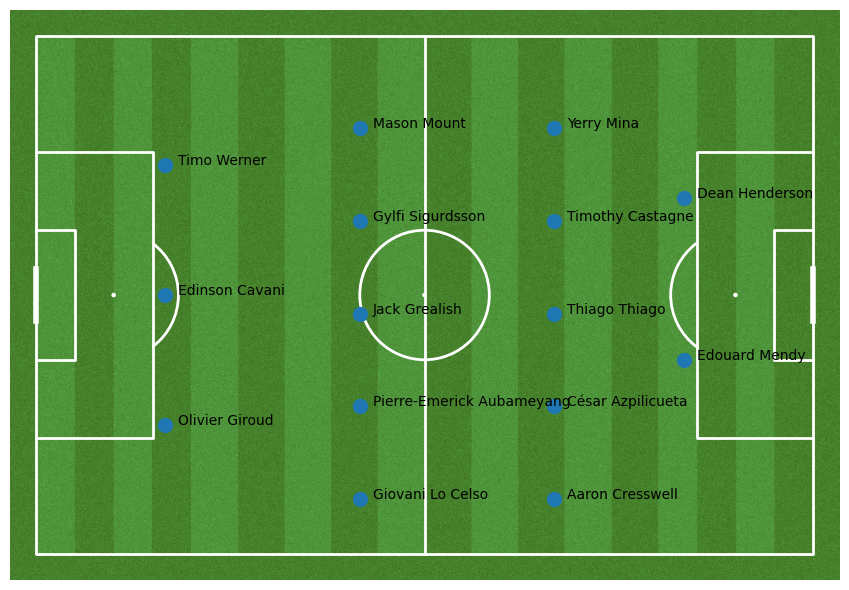

In [37]:
env.display_current_team()
plt.show()

### Render

Print the current state of the run to screen

In [38]:
env._render()

,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,no_weeks_remaining,Penalty,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,None,None,None,None,None,1026,0,1,38,0,False,"[Mason Mount, Gylfi Sigurdsson, Jack Grealish,...","[Yerry Mina, Timothy Castagne, Thiago Thiago, ...","[Timo Werner, Edinson Cavani, Olivier Giroud]","[Dean Henderson, Edouard Mendy]"


### Play Match

In [39]:
env.play_match(player_match_info_refined)

### Step Function


**Description**: Take the next step to update the player pool. 

This involves:
- swapping out one player with another
- Updating the reward function
- Removing the latest games played from the fixture table
- updating the return dictionary to reflect any chanegs that were made
 

**Input** 

**player_data** {dict} - Information on how players performed each week

**transfers** {int} - Number of transfers

**old_player_name** {list} - List of old player ids

**new_player_name** \{list} - List of new player ids

In [40]:
env._step(player_match_info_refined, 1, ['Pierre-Emerick Aubameyang'], ['Mesut Özil'])
## check player position

/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


56.0

**Output**

The updated return dictionary

In [41]:
env._render()

,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Pierre-Emerick Aubameyang,ARS,MID,Mesut Özil,ARS,1072,56.0,3,1,36,False,"[Mason Mount, Gylfi Sigurdsson, Jack Grealish,...","[Yerry Mina, Timothy Castagne, Thiago Thiago, ...","[Timo Werner, Edinson Cavani, Olivier Giroud]","[Dean Henderson, Edouard Mendy]"


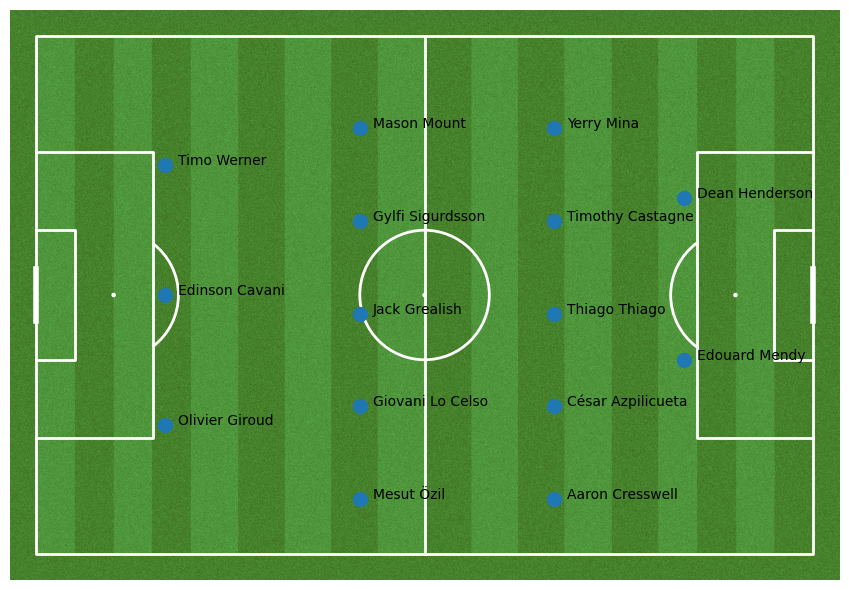

In [42]:
env.display_current_team()
plt.show()

### Swapping out Players

During each week we can also need to know the list of players that are available for us to choose from. The players are given as indices out of the original list that we passed in of player data.

A player is available if they have not been chosen before

**Note** In future this should also take into account the budget

In [43]:
available_players = env._get_available_players()
available_players

array([27, 33, 67, 43, 46, 87, 78, 83, 17, 42, 73, 40,  7, 39, 26, 53,  3,
       72, 71, 44, 84, 18, 62,  6, 52, 22, 79, 25, 65,  2, 31, 81, 30,  1,
        0, 57, 29, 61,  4, 32,  8, 41, 35, 12, 80,  5, 48, 64, 23, 54,  9,
       85, 45, 24, 20, 34, 66, 36, 13, 50, 68, 82, 60, 37, 49, 55, 16, 19,
       38, 74, 76, 86, 69, 28, 75])

### Best available players

**Description**: This functions takses a pure analytical approach to finding the "best" available player.

It takes into account the player that is being removed, so that it only chooses players of the same position. It then looks at how each of these players have performed in the season so far and chooses the player that has accumulated the most points.
, available_players

**Input** 

**old_player_name** {str} - The name of the old player that is being removed

**available_players** {list} - The list of players that are available to choose from 


**Output**
Returns the name of the name of the best performing player given the above conditions

In [44]:
env._get_best_available_performing_player('Mesut Özil', available_players)

'Bruno Miguel Borges Fernandes'

### Worst available players

This function returns the name of the "worst" performing player on the team.

In this case, the "worst" player is defined by the player who has accumulated the least amount of points 

In [45]:
env._get_worst_performing_pool_player()

'Giovani Lo Celso'